In [5]:
import pandas as pd
from sodapy import Socrata

import datetime
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%reset

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("healthdata.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(healthdata.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("g62h-syeh", limit=48000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [6]:
# results_df = pd.read_csv('BaseDeDatos.csv')

In [7]:
results_df['date'] = pd.to_datetime(results_df['date'])

In [8]:
df1 = results_df[['date','state','inpatient_beds',
                    'total_pediatric_patients_hospitalized_confirmed_covid',
                    'total_adult_patients_hospitalized_confirmed_covid','deaths_covid']]

1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [9]:
df1.insert(1, 'Year', df1['date'].dt.year)
df1.insert(2, 'Month', df1['date'].dt.month)

In [10]:
df1 = df1[df1['date'] <= '2020-6-30']

In [11]:
df1.fillna(0,inplace = True)

In [12]:
df1 = df1.astype(int, copy = True, errors = 'ignore')

In [13]:
df1.insert(7, 'Total_patients_hospitalized_covid',
            df1['total_pediatric_patients_hospitalized_confirmed_covid']+
            df1['total_adult_patients_hospitalized_confirmed_covid'])

In [14]:
df1 = df1[df1['Total_patients_hospitalized_covid'] != 0]

In [15]:
df = pd.DataFrame(df1.groupby('state',axis=0).sum()['Total_patients_hospitalized_covid'])

In [16]:
R1 = df.sort_values('Total_patients_hospitalized_covid', ascending=False).head()
R1

,Total_patients_hospitalized_covid
state,
LA,40452
CA,36134
NV,20134
AZ,5177
IA,3174


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:</br>
</br>
Intervalos de crecimiento y decrecimiento</br>
Puntos críticos (mínimos y máximos)

In [17]:
df2 = results_df[['date', 'state','inpatient_beds_used_covid']]

In [18]:
df2 = df2[df2['state'] == 'NY']

In [19]:
df2 = df2.astype(int, copy = True, errors = 'ignore')

In [20]:
df2.fillna(0, inplace=True)

In [21]:
df2 = df2[df2['inpatient_beds_used_covid'] != 0]

In [22]:
df2 = df2[df2['date'] > '2020-03-03']
df2 = df2[df2['date'] < '2021-03-01']

In [23]:
df2.sort_values('date', inplace=True)

In [24]:
x = df2['date']
y = df2['inpatient_beds_used_covid']

In [25]:
x

20739   2020-03-14
13276   2020-03-15
11986   2020-03-16
14595   2020-03-17
19858   2020-03-18
           ...    
38474   2021-02-24
37633   2021-02-25
38446   2021-02-26
34504   2021-02-27
42068   2021-02-28
Name: date, Length: 352, dtype: datetime64[ns]

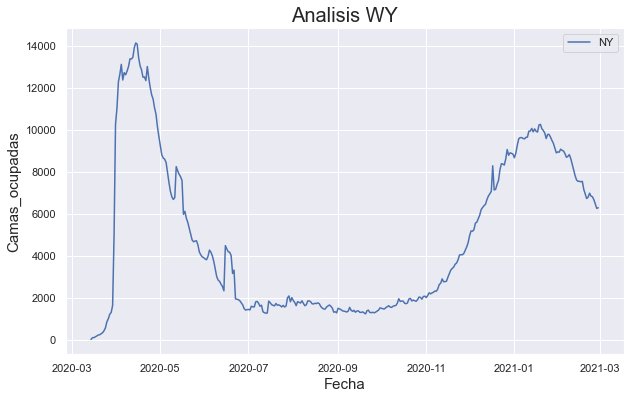

In [ ]:
sns.set()
fig = plt.figure()
ax = plt.axes()

plt.plot(x,y)
plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Camas_ocupadas',fontsize=15)
plt.title('Analisis WY',fontsize=20)
plt.gcf().set_size_inches(10, 6)
plt.legend(labels=['NY'])
plt.show()

In [ ]:
serie = df2[df2['date'] < '2020-09-01']
index = serie['inpatient_beds_used_covid'].argmin()
min1 = str(serie['date'].iloc[index]).split()
index = serie['inpatient_beds_used_covid'].argmax()
max1 = str(serie['date'].iloc[index]).split()

In [ ]:
serie = df2[df2['date'] > '2020-05-01']
serie = serie[serie['date'] < '2021-02-01']
index = serie['inpatient_beds_used_covid'].argmin()
min2 = str(serie['date'].iloc[index]).split()
index = serie['inpatient_beds_used_covid'].argmax()
max2 = str(serie['date'].iloc[index]).split()

In [ ]:
serie = df2[df2['date'] > '2021-02-01']
index = serie['inpatient_beds_used_covid'].argmin()
min3 = str(serie['date'].iloc[index]).split()

In [ ]:
intervalos = {'inicio': [min1[0], max1[0], min2[0], max2[0]], 
                'final':[max1[0], min2[0],max2[0], min3[0]],
                'variacion':['Crece', 'Decrece','Crece', 'Decrece']}

In [ ]:
intervalos = pd.DataFrame(intervalos)

In [ ]:
intervalos

,inicio,final,variacion
0,2020-03-14,2020-04-14,Crece
1,2020-04-14,2020-09-20,Decrece
2,2020-09-20,2021-01-19,Crece
3,2021-01-19,2021-02-27,Decrece


3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [ ]:
df3 = results_df[['state',
                    'date',
                    'total_staffed_adult_icu_beds']]

In [ ]:
df3 = df3[df3['date'] <= '2020-12-31']

In [ ]:
df3 = df3.fillna(0)

In [ ]:
df3 = df3.astype(int, copy = True, errors = 'ignore')


In [ ]:
resultado3 = df3.groupby('state',axis=0).sum().sort_values('total_staffed_adult_icu_beds', ascending=False)

In [ ]:
resultado3.head()

,total_staffed_adult_icu_beds
state,
CA,1228347
TX,1186925
FL,1025251
NY,856693
OH,650124


4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [ ]:
df4 = results_df[['state',
                    'date',
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_pediatric_patients_hospitalized_confirmed_covid']]

In [ ]:
df4 = df4[df4['date'] <= '2020-12-31']
df4 = df4.fillna(0)

In [ ]:
df4 = df4.astype(int, copy = True, errors = 'ignore')

In [ ]:
df4['Total_camas_usadas'] = df4['staffed_icu_pediatric_patients_confirmed_covid']+df4['total_pediatric_patients_hospitalized_confirmed_covid']

In [ ]:
resultado4 = df4.groupby('state', axis=0).sum('Total_camas_usadas').sort_values('Total_camas_usadas')

In [ ]:
resultado4 = pd.DataFrame(resultado4['Total_camas_usadas'])
resultado4

,Total_camas_usadas
state,
VT,3
VI,3
NH,88
HI,117
WY,160
ME,210
MT,321
AK,389
ND,447


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [ ]:
df5 =results_df[['state',
                    'staffed_icu_adult_patients_confirmed_covid',
                    'staffed_icu_pediatric_patients_confirmed_covid',
                    'total_staffed_pediatric_icu_beds',
                    'total_staffed_adult_icu_beds']]

In [ ]:
columnas = df5.columns[1:]
df5 = df5.fillna(0)
df5 = df5.astype(int, copy=True, errors='ignore')

In [ ]:
df5.insert(3, 'UCIs_ocupadas', df5[columnas[0]]+df5[columnas[1]])
df5.insert(6, 'UCIs_total', df5[columnas[2]]+df5[columnas[3]])
resultado5 = df5[['state', 'UCIs_ocupadas', 'UCIs_total']]
resultado5 = resultado5.groupby('state').sum()

In [ ]:
resultado5['Ocupacion_%'] = round(resultado5.UCIs_ocupadas*100/resultado5.UCIs_total, 2)
resultado5

,UCIs_ocupadas,UCIs_total,Ocupacion_%
state,,,
AK,11431,131042,8.72
AL,220295,1202952,18.31
AR,140592,977957,14.38
AS,2,2491,0.08
AZ,239178,1671121,14.31
CA,905591,7377339,12.28
CO,149101,1222336,12.20
CT,59940,944339,6.35
DC,22011,314038,7.01


6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [ ]:
df6 = results_df[['date',
                'state',
                'deaths_covid']]

In [ ]:
df6 = df6[df6['date'] >= '2021-01-01']
df6 = df6[df6['date'] <= '2021-12-31']

In [ ]:
df6 = df6.fillna(0)
df6['deaths_covid'] = df6['deaths_covid'].astype(int)
resultado6 = pd.DataFrame(df6.groupby('state').sum())

In [ ]:
resultado6 = resultado6.sort_values('deaths_covid', ascending=False)
resultado6

,deaths_covid
state,
CA,35108
TX,32889
FL,26004
NY,17620
AZ,16250
PA,13363
GA,12338
OH,12023
NC,10922


7 - ¿Qué relación presenta la falta de <u>personal médico</u> con la cantidad de muertes durante el año 2021?

In [ ]:
df7 = results_df[['date',
                'critical_staffing_shortage_today_yes',
                'deaths_covid']]

In [ ]:
columnas = df7.columns[1:]
df7= df7.fillna(0)
for i in columnas:
    df7[i] = df7[i].astype(int)
df7.sort_values('date', inplace=True)
df7 = df7[df7['date'] >= '2021-01-01']
df7 = df7[df7['date'] <= '2021-12-31']

In [ ]:
x = df7['date']
y_fpm = df7['critical_staffing_shortage_today_yes']
y_mc = df7['deaths_covid']

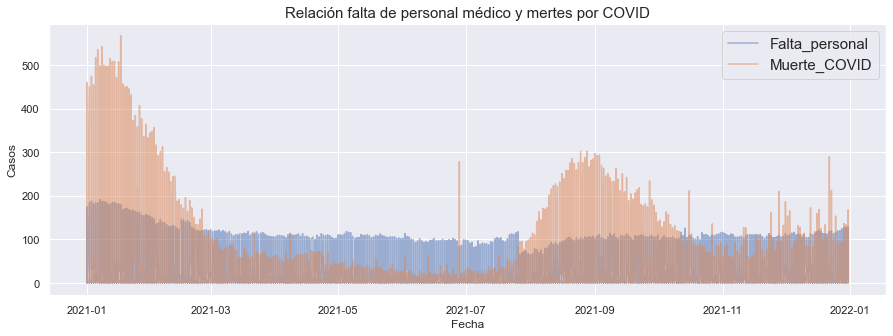

In [ ]:
sns.set()
fig = plt.figure()
ax = plt.axes()

plt.plot(x,y_fpm, alpha = 0.5)
plt.plot(x,y_mc, alpha = 0.5)
plt.xlabel('Fecha',fontsize=12)
plt.ylabel('Casos',fontsize=12)
plt.title('Relación falta de personal médico y mertes por COVID',fontsize=15)
plt.gcf().set_size_inches(15, 5)
plt.legend(labels=['Falta_personal', 'Muerte_COVID'], fontsize = 15)
plt.show()

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [ ]:
df8 = results_df[['date',
            'critical_staffing_shortage_today_yes',
            'deaths_covid',
            'staffed_icu_adult_patients_confirmed_covid',
            'staffed_icu_pediatric_patients_confirmed_covid',
            'total_staffed_pediatric_icu_beds',
            'total_staffed_adult_icu_beds']]

In [ ]:
punto8 = df8[(df8['date'] <= '2022-08-01')]
df8 = df8.fillna(0)
columnas = df8.columns[1:]
df8 = df8.fillna(0)
df8 = df8.astype(int, copy = True, errors = 'ignore')

In [ ]:
df8.insert(3, 'UCIs_ocupadas', df8[columnas[2]]+df8[columnas[3]])
columnas = df8.columns[1:]
df8.insert(4, 'UCIs_total', df8[columnas[4]]+df8[columnas[5]])
resultado8 = df8[['date', 'critical_staffing_shortage_today_yes', 'deaths_covid', 'UCIs_ocupadas', 'UCIs_total']].copy()

In [ ]:
resultado8 = round(resultado8.groupby(pd.PeriodIndex(resultado8['date'],freq='M'),axis=0).mean(),2)

In [ ]:
resultado8.reset_index(inplace=True)

In [ ]:
resultado8['date'] = resultado8['date'].astype('datetime64')

In [ ]:
resultado8 = resultado8.sort_values('date')

In [ ]:
resultado8 = resultado8[resultado8['UCIs_total'] != 0].copy()

In [ ]:
resultado8['Ocupacion_%'] = round(resultado8.UCIs_ocupadas*100/resultado8.UCIs_total, 0)

In [ ]:
resultado8 = resultado8[['date','critical_staffing_shortage_today_yes',
                         'deaths_covid',
                         'Ocupacion_%']]

In [ ]:
resultado8

,date,critical_staffing_shortage_today_yes,deaths_covid,Ocupacion_%
6,2020-07-01,6.10,11.67,116.0
7,2020-08-01,14.74,19.03,96.0
8,2020-09-01,16.32,9.59,64.0
9,2020-10-01,17.68,10.93,64.0
10,2020-11-01,20.46,20.87,88.0
11,2020-12-01,22.80,34.49,130.0
12,2021-01-01,19.39,40.18,145.0
13,2021-02-01,15.44,22.73,94.0
14,2021-03-01,12.96,10.16,52.0
15,2021-04-01,12.44,8.96,53.0


In [ ]:
x = resultado8['date']
y_fpm = resultado8['critical_staffing_shortage_today_yes']
y_mc = resultado8['deaths_covid']
y_UCIsO = resultado8['Ocupacion_%']

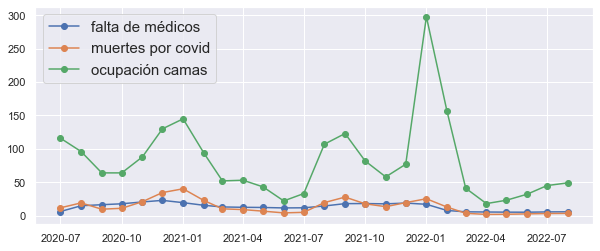

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.set_xscale('linear')
ax.plot(x, y_fpm, marker="o")
ax.plot(x, y_mc, marker="o")
ax.plot(x, y_UCIsO, marker="o")
plt.legend(labels=['falta de médicos','muertes por covid','ocupación camas'],fontsize=15)
plt.gcf().set_size_inches(10, 4)
plt.show()

9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

1. Mantener el 100 % del personal médico capacitado para futuras pandemias, con capacitaciones periodicas como politica de estado.
2. Frente a una nueva pandemia, prestar atensión a como esta afecta a los rangos etarios para priorizar a los grupos que se puedan ver más afectados.
3. Tener reservas de UCIs centralizadas para que se puedan repartir entre los centros de salud que los requiera.
4. Crear una red en la cual se pueda compartir información diaria del estado de ocupación de personal y de UCIs entre los centros de salud en cada estados y entre los estados.

In [ ]:
results_df.to_csv('BaseDeDatos.csv', index=False)